<a href="https://colab.research.google.com/github/pentagram5/DeepLearning/blob/master/DL_naver_face_recogfnition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

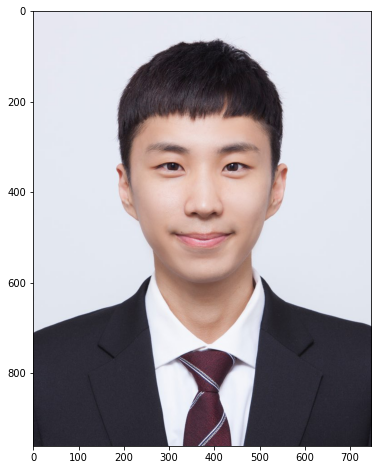

In [239]:
img_add = '/content/drive/My Drive/data/IMG_9399.JPG'
img = mpimg.imread(img_add)
plt.figure(figsize =(10,8))
plt.imshow(img)
plt.show()

In [240]:
import requests
client_id = "EYHZ2pmr_SG4GHz8kclz"
client_secret = "sY_Sa_bP1z"
url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open(img_add, 'rb')}
headers = {'X-Naver-Client-Id':client_id,
           'X-Naver-Client-Secret':client_secret}
response = requests.post(url, files = files, headers = headers)

In [241]:
import json
parsed = json.loads(response.text)
print(json.dumps(parsed, indent = 4, sort_keys = False, ensure_ascii = False))
#ensure_ascii=false : utf-8로 인코딩 된 한글을 제대로 표시해줌
#네이버 유명인 인식 api 적용 결과 

{
    "info": {
        "size": {
            "width": 747,
            "height": 961
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "박태양",
                "confidence": 0.0930474
            }
        }
    ]
}


In [242]:
import requests
client_id = "EYHZ2pmr_SG4GHz8kclz"
client_secret = "sY_Sa_bP1z"
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open(img_add, 'rb')}
headers = {'X-Naver-Client-Id':client_id,
           'X-Naver-Client-Secret':client_secret}
response = requests.post(url, files = files, headers = headers)

# 얼굴 정보 출력

In [243]:
import json
parsed = json.loads(response.text)
print(json.dumps(parsed, indent = 4, sort_keys = False, ensure_ascii = False))
#ensure_ascii=false : utf-8로 인코딩 된 한글을 제대로 표시해줌
#네이버 유명인 인식 api 적용 결과 

{
    "info": {
        "size": {
            "width": 747,
            "height": 961
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 226,
                "y": 264,
                "width": 303,
                "height": 303
            },
            "landmark": {
                "leftEye": {
                    "x": 303,
                    "y": 343
                },
                "rightEye": {
                    "x": 441,
                    "y": 342
                },
                "nose": {
                    "x": 375,
                    "y": 429
                },
                "leftMouth": {
                    "x": 301,
                    "y": 486
                },
                "rightMouth": {
                    "x": 442,
                    "y": 486
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.99666
            },
            

# 얼굴 정보 깔끔하게 표현하기 

In [244]:
detect_result = json.loads(response.text)
detect_result['faces']

[{'age': {'confidence': 0.919754, 'value': '21~25'},
  'emotion': {'confidence': 0.984513, 'value': 'neutral'},
  'gender': {'confidence': 0.99666, 'value': 'male'},
  'landmark': {'leftEye': {'x': 303, 'y': 343},
   'leftMouth': {'x': 301, 'y': 486},
   'nose': {'x': 375, 'y': 429},
   'rightEye': {'x': 441, 'y': 342},
   'rightMouth': {'x': 442, 'y': 486}},
  'pose': {'confidence': 0.999571, 'value': 'frontal_face'},
  'roi': {'height': 303, 'width': 303, 'x': 226, 'y': 264}}]

In [245]:
detect_result['faces'][0]['roi']

{'height': 303, 'width': 303, 'x': 226, 'y': 264}

In [246]:
detect_result['faces'][0]['gender']

{'confidence': 0.99666, 'value': 'male'}

In [247]:
detect_result['faces'][0]['age']

{'confidence': 0.919754, 'value': '21~25'}

In [248]:
x,y,w,h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence =  detect_result['faces'][0]['age'].values()

In [249]:
annotation  = gender + ": " +str(gen_confidence) + '\n' + emotion + " : " +str(emotion_confidence) + '\n' +age+':'+str(age_confidence)

In [250]:
print(gender,':', gen_confidence)
print(emotion,':', emotion_confidence)
print(age,':', age_confidence)

male : 0.99666
neutral : 0.984513
21~25 : 0.919754


Text(10, 400, 'male: 0.99666\nneutral : 0.984513\n21~25:0.919754')

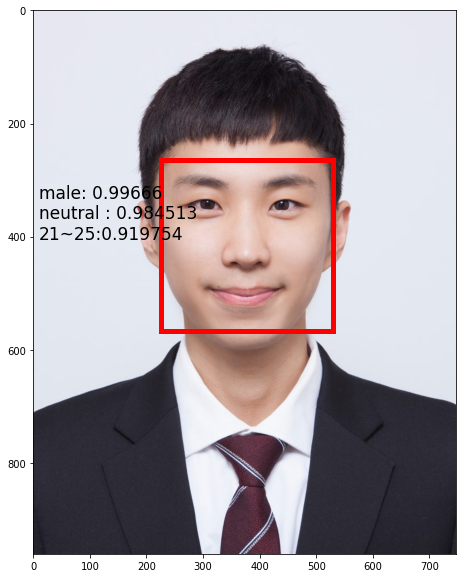

In [251]:
# patches = 사진에 도형을 그릴 수 있게 도와주는 모듈 
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y), w, h, linewidth = 5, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect_face)
plt.text(10,400, annotation, wrap = True, fontsize = 17, color = 'black')

# 여러 얼굴이 있는 사진 사용해보기 

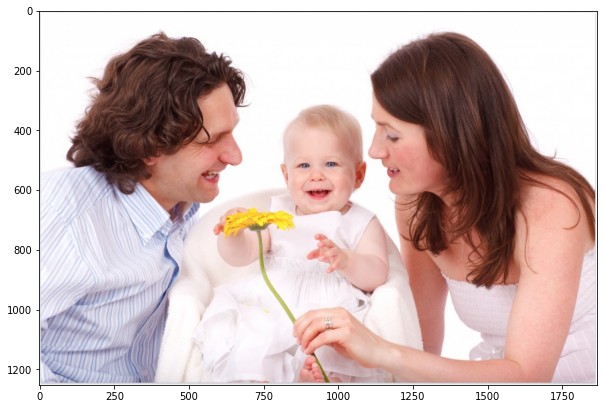

In [252]:
img_add = '/content/drive/My Drive/data/face_test_02.jpg'
img = mpimg.imread(img_add)
plt.figure(figsize =(10,8))
plt.imshow(img)
plt.show()

In [253]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open(img_add, 'rb')}
headers = {'X-Naver-Client-Id':client_id,
           'X-Naver-Client-Secret':client_secret}
response = requests.post(url, files = files, headers = headers)

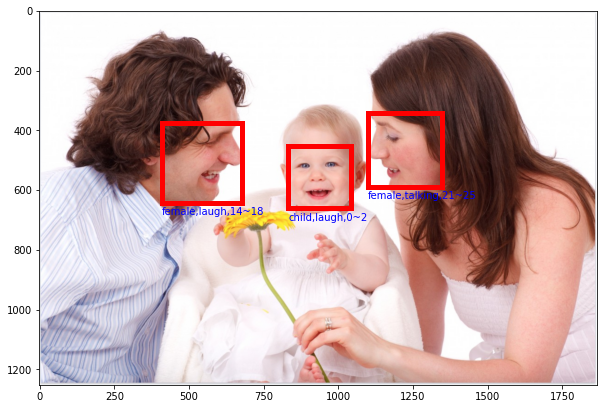

In [254]:
detect_result = json.loads(response.text)
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img)
for each in detect_result['faces']:
  x,y,w,h = each['roi'].values()
  gender, gen_confidence = each['gender'].values()
  emotion, emotion_confidence = each['emotion'].values()
  age, age_confidence =  each['age'].values()
  annotation  = gender +',' +emotion + ','+age
  rect_face = patches.Rectangle((x,y), w, h, linewidth = 5, edgecolor = 'r', facecolor = 'none')
  ax.add_patch(rect_face)
  plt.text(x,y+h+40, annotation, wrap = True, fontsize = 10, color = 'blue')